# 1. Generalization Error

1. (d) 460,000

$ϵ = \sqrt{\frac{8}{N}ln\frac{4m_H(2N)}{δ}}$, $N = N^{d_{vc}}$, $d_{vc} = 10$, $δ = 0.05$ (95% confidence interval). Therefore, $ϵ = \sqrt{\frac{8}{N}ln\frac{4m_H(2N)^{d_{vc}}}{δ}} = \sqrt{\frac{8}{N}ln\frac{4m_H(2N)^{10}}{0.05}}$. We want N such that $ϵ$ is closes to 0.05. N = 460,000 gives us an $ϵ$ closest to 0.05 (0.0496).

2. (d) Devroye

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.optimize
from sklearn.linear_model import LinearRegression

In [ ]:
d_vc = 50
delta = 0.05
N_range = np.linspace(9000, 10000, 100)

In [ ]:
def original_vc(N):
  return math.sqrt(8/N * math.log(4 * (2 * N) ** d_vc / delta))

def rade_penalty(N):
  return math.sqrt(2 * math.log(2 * N * N ** d_vc) / N) + math.sqrt(2/N * math.log(1/delta)) + 1/N

# implicit bounds
def parr_van(N):
  def parr_van_root(e):
    return math.sqrt(1/N * (2 * e + math.log(6 * (2 * N) ** d_vc / delta))) - e
  return scipy.optimize.brentq(parr_van_root, 0, 10)

def devroye(N):
  def devroye_root(e):
    return math.sqrt(1/(2*N) * (4 * e * (1 + e) + d_vc * math.log(N ** 2) + math.log(4 / delta))) - e
  return scipy.optimize.brentq(devroye_root, 0, 10)

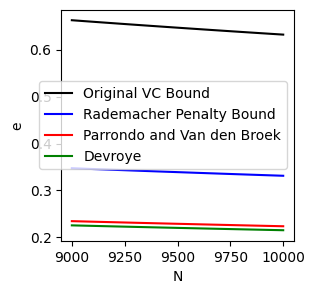

In [ ]:
plt.figure(figsize=(3, 3))
plt.plot(N_range, [original_vc(N) for N in N_range], 'black', label="Original VC Bound")
plt.plot(N_range, [rade_penalty(N) for N in N_range], 'blue', label="Rademacher Penalty Bound")
plt.plot(N_range, [parr_van(N) for N in N_range], 'red', label="Parrondo and Van den Broek")
plt.plot(N_range, [devroye(N) for N in N_range], 'green', label="Devroye")
plt.xlabel("N")
plt.ylabel("e")
plt.legend()
plt.show()

3. (c) Parrondo and Van den Broek

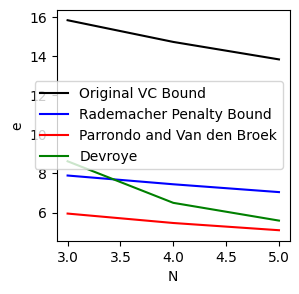

In [ ]:
N_range = list(range(3, 6))
plt.figure(figsize=(3, 3))
plt.plot(N_range, [original_vc(N) for N in N_range], 'black', label="Original VC Bound")
plt.plot(N_range, [rade_penalty(N) for N in N_range], 'blue', label="Rademacher Penalty Bound")
plt.plot(N_range, [parr_van(N) for N in N_range], 'red', label="Parrondo and Van den Broek")
plt.plot(N_range, [devroye(N) for N in N_range], 'green', label="Devroye")
plt.xlabel("N")
plt.ylabel("e")
plt.legend()
plt.show()

# Bias and Variance

4. (e) None of the above

In [ ]:
N_samples = 10000
def f(x):
  return math.sin(math.pi * x)

avg_slope = 0
slopes = []
for i in range(N_samples):
    X = [random.random() * 2 - 1, random.random() * 2 - 1]
    y = [f(X[0]), f(X[1])]
    X = np.array(X).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    reg = LinearRegression(fit_intercept=False).fit(X, y)
    avg_slope += reg.coef_[0][0]
    slopes.append(reg.coef_[0][0])

avg_slope /= N_samples
avg_slope = round(avg_slope, 2)
print(f'Average a: {avg_slope}')

Average a: 1.43


5. (b) 0.3

In [ ]:
bias = 0
N_test = 1000
for i in range(N_test):
    x = random.random() * 2 - 1
    y = f(x)
    pred = avg_slope * x
    bias += (y - pred) ** 2
bias /= N_test
bias = round(bias, 2)
print(f'Bias: {bias}')

Bias: 0.27


6. (a) 0.2

In [ ]:
variance = 0
for i in range(N_test):
  x = random.random() * 2 - 1
  for slope in slopes:
    variance += (avg_slope * x - slope * x) ** 2

variance /= N_test * len(slopes)
variance = round(variance, 2)
print(f'Variance: {variance}')

Variance: 0.24


7. (b) Hypothesis h(x) = ax + b

The least expected out of sample error is the bias + variance.

(a) From lecture and notes, we know that the constant model, h(x) = b scores 0.75.

(b) From our answers to 4-6, we know that h(x) = ax has an expected of out sample error of around 0.5.

(c) From lecture and notes, we know that the linear model, h(x) = ax + b scores 1.90.

(d) and (e) Both these choices will have large out of sample error due to the complexity of the quadratic equation.

Therefore, h(x) = ax has the least expected out of sample error.

# VC Dimension

8. (c) q

$m_H(N+1) = 2m_H(N)- {N \choose q}$. At the breakpoint, this equation will no longer be satisfied. Since ${M \choose m} = 0$ when $m > M$, then $m_H(N+1) = 2m_H(N)- {N \choose q} = 2^{N+1}$ when $q > N$.

At q and q+1 dimensions, we see

$m_H(q) = 2m_H(q-1)- {q-1 \choose q} = 2^{q}$

$m_H(q+1) = 2m_H(q)- {q \choose q} = 2^{q+1} - 1$

Therefore, the VC dimension is q.

9. (b) $0 \leq Intersection \leq min\{d_{vc}(H_k)\}_{k=1}^{k}$

The number of points in the intersection of hypotheses sets cannot exceed the size of the set with the minimum VC dimension. Therefore, the upper bound of the hypothesis is the one with the minimum VC dimension. The lower bound is 0 if a set is empty.

10. (e) $max\{d_{vc}(H_k)\}_{k=1}^{K} \leq Union \leq K - 1 + \sum_{k=1}^{K} d_{vc}(H_k)$

Since we know that there are sets with positive VC Dimensions, the minimum bound cannot equal 0. Therefore, we can rule out (a) and (b). We can also rule out (c) because the minimum value should be the the set with the highest VC dimension. This is because we are dealing with the union of the sets, we take the combination of all sets. To determine the tightest bound between (d) and (e), we can use an example.
Let [-1,1] be the range for a set of Hypotheses, $H_1$ and $H_2$. Let $H_1$ be the hypothesis that classifies all points as +1 and $H_2$ classify them all as -1. The VC dimensions for both hypotheses is 0 because it cannot shatter points with the same value (+1 or -1). However, when we take the union of both sets, we can shatter 1 point which is the VC dimension. Since this is greater than the sum of the VC dimensions of each hypothesis, the upper bound cannot be $\sum_{k=1}^{K} d_{vc}(H_k)$. Therefore the only remaining valid answer is (e).